# Generator of TORUS graphs of side N and dimensions d

The generator follows the formula below in set-builder notation.

$N^d[\{[[N^i]*(N^{i+1}-N^i),[N^{d-i}]*N^{d-i-1}]*N^{d-i}  |  i \in \mathbb{N}_0, i < d-1 \} \cup \{[N^{d-1}]*N^d\}] 1$

Multiplication of objects in [ ] brackets creates that many copies of it. Example: $[2]*3 = [2,2,2]$

Another example:

$[4,3]*2 = [4,3,4,3]$

It produces a LCFS sequence that constructs a toroidal graph

by Christopher Stone


In [ ]:
#@title Imports
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import random
import math


### LCFS Parser

In [ ]:
def LCFS(N_vertices, sequence, repetitions):
  G = nx.Graph()
  vertices = range(N_vertices)
  currentVertex = 0

  for v in vertices:
    G.add_node(v)

  for i in range(len(sequence)*repetitions):
    if(sequence[i%len(sequence)] != 0):
      target = currentVertex + sequence[i]
      G.add_edge(currentVertex%N_vertices, target%N_vertices)
      #print(currentVertex%N_vertices, target%N_vertices)
    currentVertex = (1 + currentVertex)% N_vertices

  return G

### DONUT graph Generator

For each $i$ from 0 to $d-2$ it creates a subsequence with a value $N^i$ repeated $N^{i+1}-N^i$ times, followed by the value $N^{d-i}-N^{d-i-1}+1$ repeated $N^i$ , all repeated $N^{d-i}$ times.

THEN followed by the value $N^{d-1}$ repeated $N^d$ times

In [ ]:
def HGG(N,d):
  sequence = []
  for i in range(d):
    subsequence = []
    subsequence.extend([math.pow(N,i)]*int((math.pow(N,i+1)-math.pow(N,i))) )
    subsequence.extend([0]*int(math.pow(N,i)))
    subsequence = subsequence * int(math.pow(N,d-i))
    sequence.extend(subsequence)
  sequence = [int(item) for item in sequence]
  return sequence

# DONUT GENERATOR
def HD(N,d):
  sequence = []
  for i in range(d-1):
    subsequence = []
    subsequence.extend([math.pow(N,i)]*int((math.pow(N,i+1)-math.pow(N,i))) )
    subsequence.extend([int((math.pow(N,d-i)-math.pow(N,d-i-1)))+1]*int(math.pow(N,i)))
    subsequence = subsequence * int(math.pow(N,d-i))
    sequence.extend(subsequence)
  sequence.extend([math.pow(N,d-1)]*int(math.pow(N,d)))
  sequence = [int(item) for item in sequence]
  return sequence

# DONUT GENERATOR
def HD2(N,d):
  sequence = []
  for i in range(d-1):
    subsequence = []
    subsequence.extend([N**i]*int(N**(i+1)-N**i))
    subsequence.extend([N**(d-i)-N**(d-i-1)+1]*int(N**i))
    subsequence = subsequence * int(N**(d-i))
    sequence.extend(subsequence)
  sequence.extend([N**(d-1)]*int(N**d))
  sequence = [int(item) for item in sequence]
  return sequence

In [ ]:
SideLength=2
dimensions = 5
s = HGG(SideLength,dimensions)
g = LCFS(int(math.pow(SideLength, dimensions)),s,1)

In [ ]:
SideLength=30
diameter = 10
dimensions = 2
#s = HD(SideLength,dimensions)
s = [1]*(SideLength-1) # row of 1
s.extend([diameter*SideLength-SideLength+1]) # wrap row
s = s*diameter # create all of rows
s.extend([SideLength]*SideLength*diameter) # columns + auto wrap
#s.extend([(SideLength*SideLength)-SideLength]) # wrap column
g = LCFS(diameter*SideLength,s,1)

In [ ]:
Side = 10
dimensions = 3
#s = HD(SideLength,dimensions)
s = [1]*(Side-1) # row of 1
s.extend([Side*Side-Side+1]) # wrap row
s = s*Side # create all of rows
s.extend([Side]*(Side*Side-1)) # columns
s.extend([Side*Side*Side-Side*Side+1]*(Side*Side*Side)) # z + auto wrap
#s.extend([(SideLength*SideLength)-SideLength]) # wrap column
g = LCFS(int(math.pow(Side, dimensions)),s,1)

In [ ]:
SideLength=30
dimensions = 2
s = HD2(SideLength,dimensions)
g = LCFS(int(math.pow(SideLength, dimensions)),s,1)

In [ ]:
nx.draw(g, nx.circular_layout(g),node_size=30)

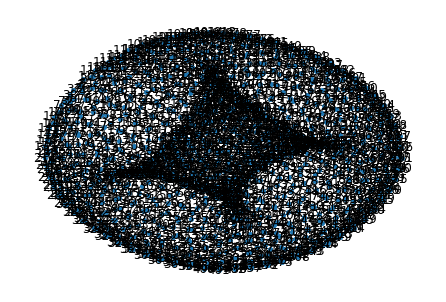

In [ ]:
nx.draw(g, nx.fruchterman_reingold_layout(g,iterations = 1230),node_size=15,with_labels = True)

In [ ]:
#@title 3D Plot
layt = nx.spring_layout(g,k=1,iterations = 1750, dim=3)

#layt=g.layout('fr3d', dim=3)
N = g.number_of_nodes()
Xn=[layt[k][0] for k in range(N)]# x-coordinates of nodes
Yn=[layt[k][1] for k in range(N)]# y-coordinates
Zn=[layt[k][2] for k in range(N)]# z-coordinates
Xe=[]
Ye=[]
Ze=[]
for e in g.edges:
    Xe+=[layt[e[0]][0],layt[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[layt[e[0]][1],layt[e[1]][1], None]
    Ze+=[layt[e[0]][2],layt[e[1]][2], None]

trace1=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgb(125,125,125)', width=1),
               hoverinfo='none'
               )

trace2=go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers',
               name='Articles',
               marker=dict(symbol='circle',
                             size=4,
                             color='rgb(50,110,250)',
                             colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               #text=labels,
               hoverinfo='text'
               )

axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

layout = go.Layout(
         title="Graph",
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest'
    ,    )

data=[trace1, trace2]
fig=go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
for i in range(10):
  for i in range(20):
    #print()
    g.remove_edge(*random.choice(list(g.edges)))
  nx.draw(g, nx.fruchterman_reingold_layout(g,iterations = 200, pos=g.pos),node_size=30)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 

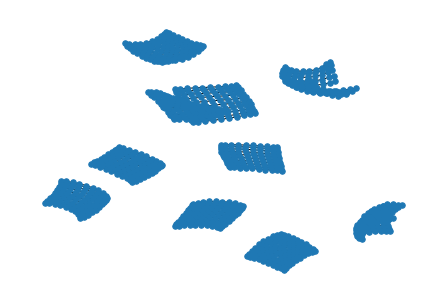

In [ ]:
s = HGG(10,2)
print(s)
for i in range(20):
  s[i] = 0

print(s)
g2 = LCFS(int(math.pow(SideLength, dimensions)),s,1)
print(s)
nx.draw(g2, nx.fruchterman_reingold_layout(g2,iterations = 200),node_size=30)

In [ ]:
random.randint(0,len(s))

1426

In [ ]:
print(s)

NameError: ignored

In [ ]:
g.edges

EdgeView([(0, 1), (0, 5), (1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 8), (4, 24), (4, 9), (5, 6), (5, 10), (6, 7), (6, 11), (7, 8), (7, 12), (8, 9), (8, 13), (9, 14), (10, 11), (10, 15), (11, 12), (11, 16), (12, 13), (12, 17), (13, 14), (13, 18), (14, 19), (15, 16), (15, 20), (16, 17), (16, 21), (17, 18), (17, 22), (18, 19), (18, 23), (19, 24), (20, 21), (21, 22), (22, 23), (23, 24)])